In [ ]:
from google.colab import files
iris = files.upload()

Saving iris (2).csv to iris (2).csv


In [ ]:
import pandas as pd
data1 = pd.read_csv("iris (2).csv")
df1 = pd.DataFrame(data1)
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


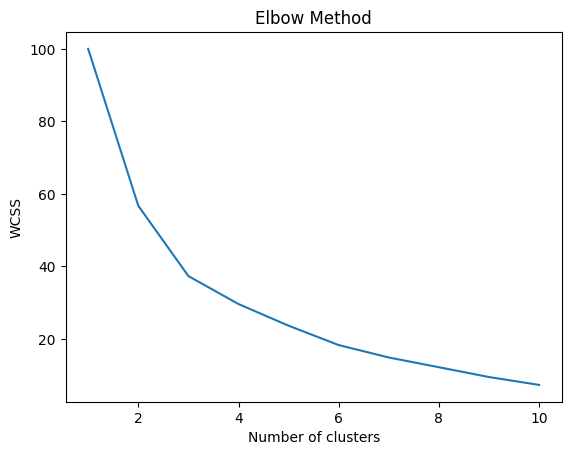

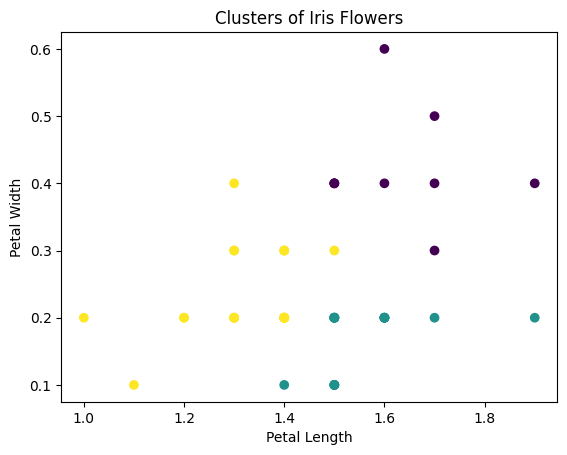

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = df1.drop(['sepal_length','sepal_width','species'],axis=1)

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(scaled_df)
df['cluster'] = pred_y
plt.scatter(df['petal_length'], df['petal_width'], c=df['cluster'])
plt.title('Clusters of Iris Flowers')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()
